# Classify the Size Category of Forest Fire using SVM

In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [119]:
#Loading the datasets
forest_fire=pd.read_csv('C:/Data Science/Assignments/SVM/forestfires.csv')
forest_fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [120]:
forest_fire.columns.values

array(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay',
       'monthnov', 'monthoct', 'monthsep', 'size_category'], dtype=object)

In [107]:
forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [108]:
forest_fire.shape

(517, 31)

In [109]:
#Check for any missing values
#forest_fire.isna().sum()
#Check for missing values
forest_fire.isnull().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [121]:
forest_fire.iloc[0:2,0:18].values

array([['mar', 'fri', 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0, 0.0, 1,
        0, 0, 0, 0, 0, 0],
       ['oct', 'tue', 90.6, 35.4, 669.1, 6.7, 18.0, 33, 0.9, 0.0, 0.0, 0,
        0, 0, 0, 0, 1, 0]], dtype=object)

In [122]:
forest_data = forest_fire

In [123]:
#Remove Extra Columns
forest_fire = forest_data.drop(['dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb',
                      'monthjan','monthjul','monthjun','monthmar','monthmay','monthnov',
                      'monthoct','monthsep'],axis=1)

In [124]:
forest_fire.shape

(517, 12)

In [125]:
#Descriptive Statistics
forest_fire.describe

<bound method NDFrame.describe of     month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    size_category  
0           small  
1           small  
2           small  
3        

In [126]:
#Data Pre-Processing
# Encode Data for Month and Day
forest_fire.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fire.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [127]:
forest_fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [128]:
#let's see how many unique categories we have in this output class - size category
size_set = set(forest_fire['size_category'])
print(size_set)

{'large', 'small'}


In [129]:
# Just transforming size category to category 1 and 0.
forest_fire['size_category'] = forest_fire['size_category'].map({'small': 0, 'large': 1}).astype(int)

In [130]:
forest_fire.dtypes

month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
size_category      int32
dtype: object

In [131]:
forest_fire.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0
516,11,2,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BB3B771408>,
      dtype=object)

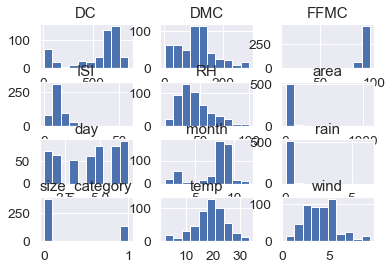

In [161]:
forest_fire.hist()
#Observation 'Temp' has a near Guassian/Normal Distribution. There are a mixture of positive skews and negative skews among the other attributes

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

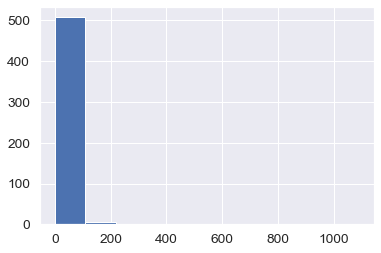

In [162]:
plt.hist(forest_fire.area)
#Observation Most of the dataset's samples fall between 0 and 200 of 'Area' 

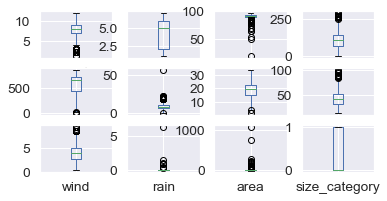

In [167]:
#Box Plot
forest_fire.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

In [133]:
#Correlation Matrix for Data Analysis
print("Correlation:", forest_fire.corr(method='pearson'))

Correlation:                   month       day      FFMC       DMC        DC       ISI  \
month          1.000000 -0.050837  0.291477  0.466645  0.868698  0.186597   
day           -0.050837  1.000000 -0.041068  0.062870  0.000105  0.032909   
FFMC           0.291477 -0.041068  1.000000  0.382619  0.330512  0.531805   
DMC            0.466645  0.062870  0.382619  1.000000  0.682192  0.305128   
DC             0.868698  0.000105  0.330512  0.682192  1.000000  0.229154   
ISI            0.186597  0.032909  0.531805  0.305128  0.229154  1.000000   
temp           0.368842  0.052190  0.431532  0.469594  0.496208  0.394287   
RH            -0.095280  0.092151 -0.300995  0.073795 -0.039192 -0.132517   
wind          -0.086368  0.032478 -0.028485 -0.105342 -0.203466  0.106826   
rain           0.013438 -0.048340  0.056702  0.074790  0.035861  0.067668   
area           0.056496  0.023226  0.040122  0.072994  0.049383  0.008258   
size_category  0.080316  0.016796  0.022063  0.034715  0.019428

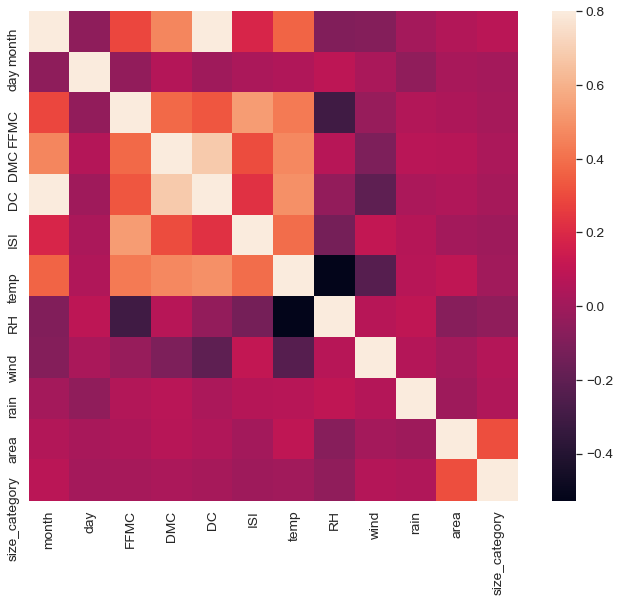

In [134]:
#correlation matrix
corrmat = forest_fire.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

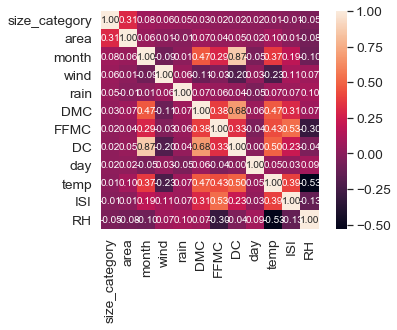

In [88]:
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'size_category')['size_category'].index
cm = np.corrcoef(forest_fire[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [135]:
#Data Normalization
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
array = forest_fire.values
# separate array into input and output components

X = forest_fire.iloc[:,0:11].values
Y = forest_fire.iloc[:,11].values
names = forest_fire.iloc[:,0:11].columns

#Split this into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# summarize transformed data
set_printoptions(precision=3)
print(X_train[0:11,:])
print(X_test[0:11,:])

[[ 0.245 -1.57   0.767  0.386  0.201  2.554  2.072 -1.05  -0.187 -0.088
  -0.211]
 [-0.191 -1.09  -0.825 -0.961 -0.929 -1.08  -0.149 -0.186 -0.688 -0.088
  -0.246]
 [-1.935 -1.57  -0.081 -1.094 -1.836 -0.599 -0.642 -1.112 -0.465 -0.088
   0.391]
 [ 0.245 -0.13   0.023  1.292  0.388 -0.474 -0.466  1.109 -0.688 -0.088
   0.077]
 [-0.191 -1.09   0.3   -0.221 -0.382  0.633  0.803 -0.865  0.815 -0.088
  -0.253]
 [-0.191  0.35   0.179 -0.159 -0.318 -0.578  0.715 -0.31  -1.467 -0.088
  -0.2  ]
 [ 0.681 -1.09   0.075  0.294  0.586 -0.432 -0.008 -0.31  -0.966 -0.088
   4.049]
 [ 0.681 -0.13   0.404  0.409  0.642  0.027  1.561 -1.297 -0.966 -0.088
  -0.253]
 [ 0.681  0.35   0.646 -0.392  0.585  1.426  0.221  0.122  0.537 -0.088
   0.275]
 [ 0.681  0.35   0.317  0.114  0.488  0.654  0.133 -0.742  1.316 -0.088
  -0.253]
 [-1.935  0.35   0.196 -1.193 -1.872 -0.015 -1.858  3.208  0.036  0.478
  -0.253]]
[[ 0.245  0.35   0.577  0.389  0.163  1.259  0.345 -0.68   0.537 -0.088
  -0.112]
 [-2.371  1.309

In [136]:
X_train.shape

(361, 11)

In [137]:
X_test.shape

(156, 11)

In [139]:
# Decide the Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

#Now combine train and test data into one dataset
X1 = np.append(X_train,X_test,axis=0)
Y1 = np.append(y_train, y_test,axis=0)

print(X1.shape)
print(Y1.shape)
#print(X1[0:2,])
#print(Y1[0:2,])

# feature extraction
model = ExtraTreesClassifier(n_estimators = 15, criterion ='gini')
model.fit(X1, Y1)
print(model.feature_importances_)
#print(model.n_features_)
print(names)

[0.032 0.037 0.038 0.038 0.039 0.034 0.053 0.05  0.053 0.006 0.622]
Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area'],
      dtype='object')


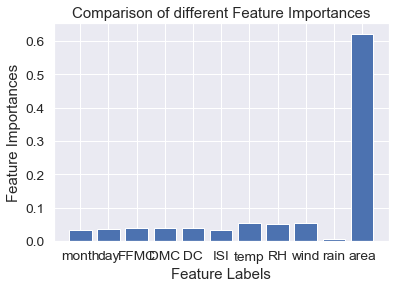

In [140]:
# Plotting a Bar Graph to compare the features
plt.bar(names, model.feature_importances_) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 
#Based on the output, we are removing rain as it has least significance, retaining other features
#Highly significant feature is area

In [150]:
#####################################################
# Feature Importance Method2
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
model=SelectFromModel(Lasso(alpha=0.01,random_state=None))
model.fit(X1, Y1)
print(model.get_support())
print(names)

[ True False False False  True False  True  True  True  True  True]
Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area'],
      dtype='object')


In [154]:
#Remove Unwanted Feature
print('Before', X1.shape)
print('Before:', names)
X1 = np.delete(X1,9,axis=1)
print('After;',X1.shape)
#print(X1[0:2,])

Before (517, 11)
Before: Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area'],
      dtype='object')
After; (517, 10)
After: Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area'],
      dtype='object')
[[ 0.245 -1.57   0.767  0.386  0.201  2.554  2.072 -1.05  -0.187 -0.211]
 [-0.191 -1.09  -0.825 -0.961 -0.929 -1.08  -0.149 -0.186 -0.688 -0.246]]


In [155]:
#Delete unwanted feature from train and test data-set
#print('before train',X_train.shape)
#print('before test',X_test.shape)
X_train = np.delete(X_train,9, axis=1)
X_test = np.delete(X_test,9, axis=1)
#print('after train', X_train.shape)
#print('after test', X_test.shape)

before train (361, 11)
before test (156, 11)
after train (361, 10)
after test (156, 10)


In [156]:
# SVM Model building 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(C=1, kernel='linear', random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#get Model Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9358974358974359


In [157]:
#Implement GridSearch CV for Hyperparameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
              {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7]}] 

grid_search = GridSearchCV(estimator=model, 
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)

grid_search = grid_search.fit(X_train,y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.9888888888888889
{'C': 100, 'kernel': 'linear'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


In [158]:
#Best Fit Model based on Hyperparametres
model = SVC(C=100, kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [159]:
#Print Confusion Matrix and model accuracy
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_pred)
print(cn)
#Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy) #Based on the output, accuracy score has improved

[[118   2]
 [  4  32]]
0.9615384615384616
